![title](螢幕快照 2019-03-14 下午10.31.09.png)

TPR = TP / (TP+FN) -> x

FPR = FP / (FP+TN) -> y

![title](Curvas.png)

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import os 
os.getcwd()

'/Users/syushengwei/Desktop/PaperCode_Analysis/Epcho'

In [5]:
import json 
import codecs

In [6]:
with codecs.open('Audio_CRNN_100_History.json','r',encoding ='utf8') as infile:
    History = json.load(infile)

In [7]:
History.keys()

dict_keys(['val_loss', 'val_auc', 'loss', 'auc', 'AUC_test', 'Timer'])

In [48]:
cut_point = 100

In [49]:
epcho_num = [x+1 for x in range(cut_point)] # this  is x

In [50]:
coefficients = np.polyfit(epcho_num,History['AUC_test'][:cut_point],10)
p = np.poly1d(coefficients)

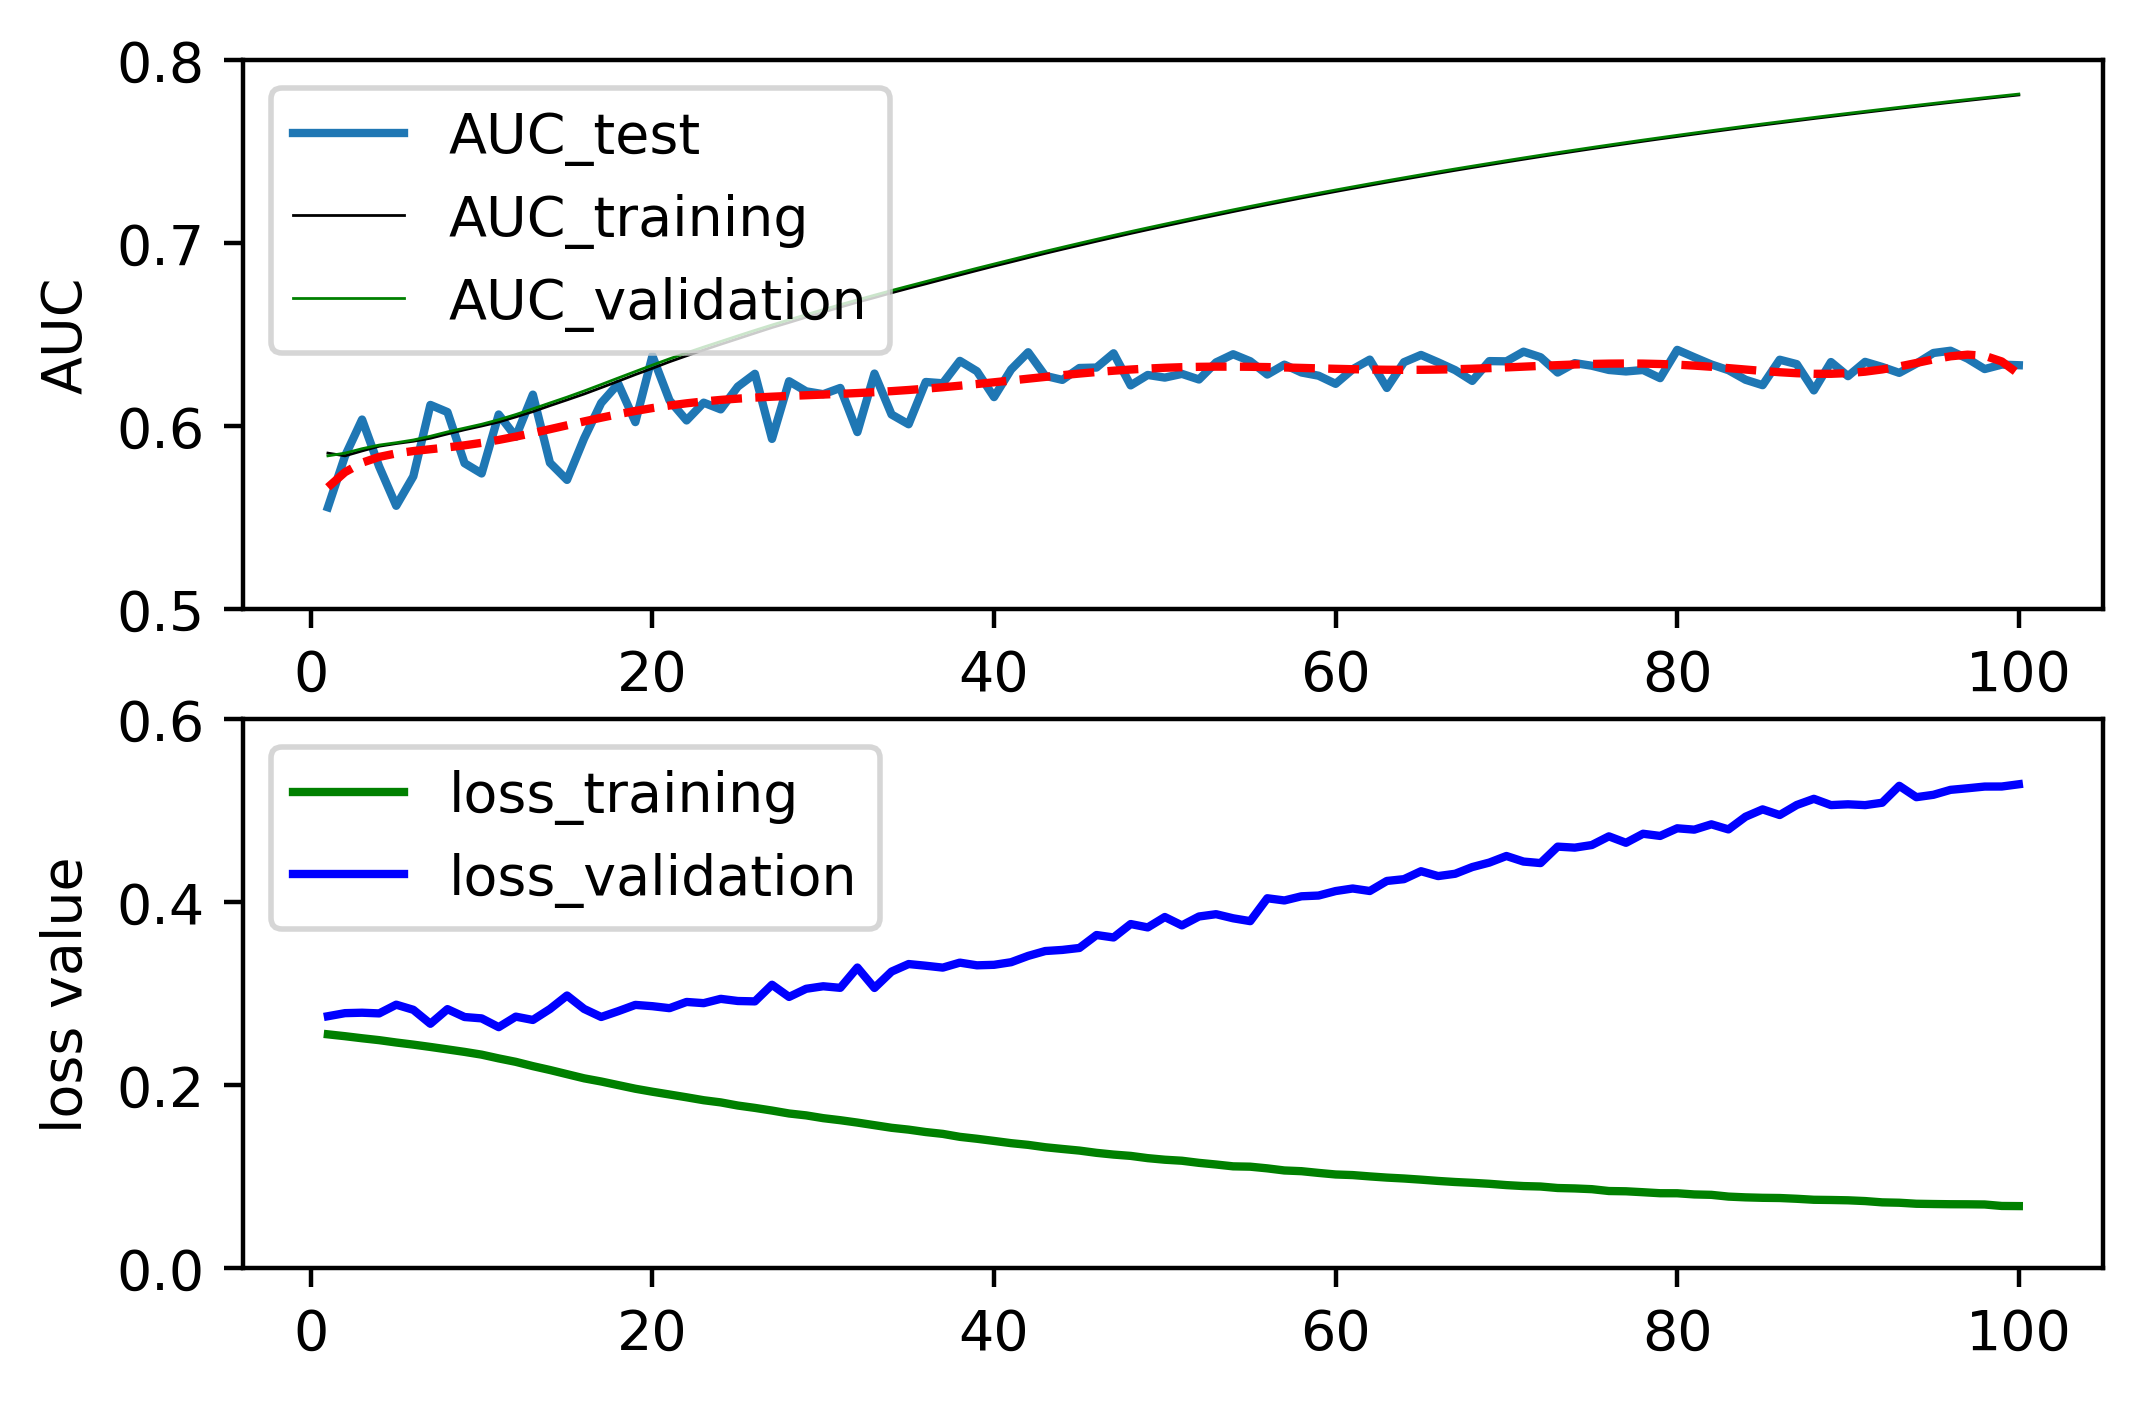

In [51]:
fig = plt.figure(dpi=400)
ax1 = fig.add_subplot(211)
ax1.set_ylabel("AUC")
ax1.set_ylim(0.5,0.8)
ax1.set_xlabel("epcho")
ax1.plot(epcho_num,History['AUC_test'][:cut_point],label='AUC_test')
ax1.plot(epcho_num,History['auc'][:cut_point],lw=0.5,color = 'black',label='AUC_training')
ax1.plot(epcho_num,History['val_auc'][:cut_point],lw=0.5,color = 'g',label='AUC_validation')
ax1.plot(epcho_num,p(epcho_num),"r--")
ax1.legend( loc='best')
#ax2 = ax1.twinx()
ax2 = fig.add_subplot(212)
ax2.set_ylabel("loss value")
ax2.plot(epcho_num,History['loss'][:cut_point],'g',label = 'loss_training')
ax2.plot(epcho_num,History['val_loss'][:cut_point],'b', label ='loss_validation')
ax2.set_ylim(0,0.6)
ax2.legend( loc='best')
plt.show()

In [52]:
History['val_loss'].index(np.array(History['val_loss']).min())

10

In [53]:
import heapq
num_larg = 11
History['AUC_test'].index(History['AUC_test'][10])

10

In [54]:
loss_cross = np.array(History['val_loss'])-np.array(History['loss'])

In [55]:
list(loss_cross).index(loss_cross.min())

0

In [56]:
with codecs.open('Audio_CRNN_old_History.json','r',encoding ='utf8') as infile:
    History_Old = json.load(infile)

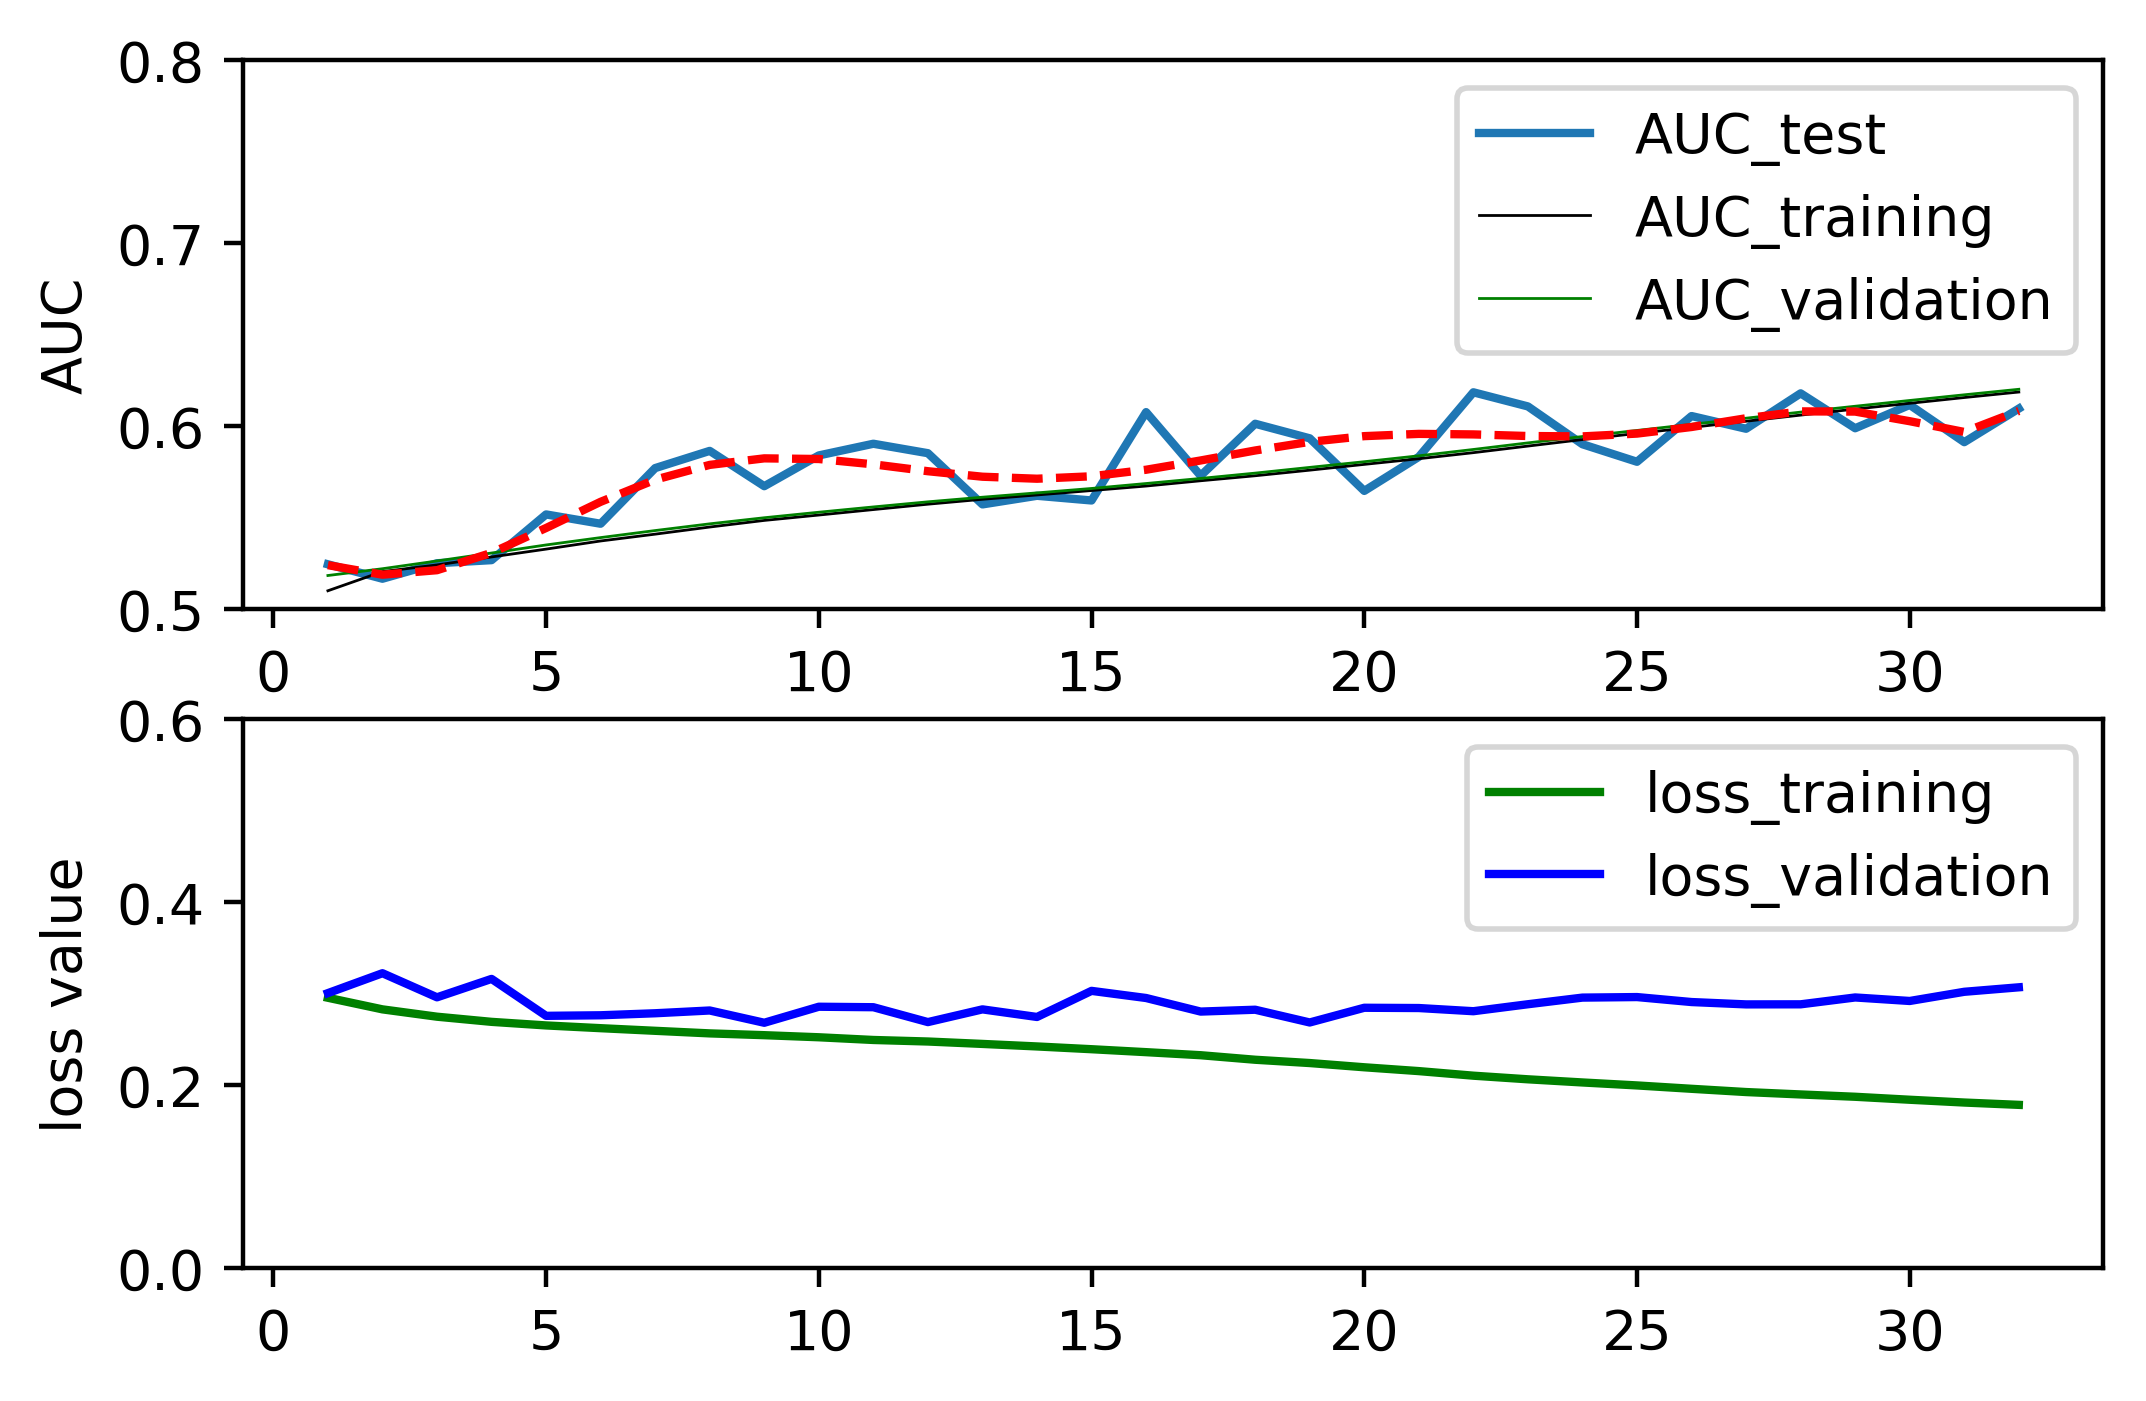

In [57]:
epcho_num = [x+1 for x in range(len(History_Old['AUC_test']))] # this  is x
coefficients = np.polyfit(epcho_num,History_Old['AUC_test'],10)
p = np.poly1d(coefficients)
fig = plt.figure(dpi=400)
ax1 = fig.add_subplot(211)
ax1.set_ylabel("AUC")
ax1.set_ylim(0.5,0.8)
ax1.set_xlabel("epcho")
ax1.plot(epcho_num,History_Old['AUC_test'],label='AUC_test')
ax1.plot(epcho_num,History_Old['auc'],lw=0.5,color = 'black',label='AUC_training')
ax1.plot(epcho_num,History_Old['val_auc'],lw=0.5,color = 'g',label='AUC_validation')
ax1.plot(epcho_num,p(epcho_num),"r--")
ax1.legend( loc='best')
#ax2 = ax1.twinx()
ax2 = fig.add_subplot(212)
ax2.set_ylabel("loss value")
ax2.plot(epcho_num,History_Old['loss'],'g',label = 'loss_training')
ax2.plot(epcho_num,History_Old['val_loss'],'b', label ='loss_validation')
ax2.set_ylim(0,0.6)
ax2.legend( loc='best')
plt.show()